In [1]:
import pandas as pd

# df = pd.read_csv(r"C:\Users\ASUS\Downloads\SC4020 Data Mining Group 39 Assignment 2\SC4020-Data-Mining-Group-39-Project-2\Cancer_Data.csv")
df = pd.read_csv("./Cancer_Data.csv")
df.drop(columns=["Unnamed: 32"],inplace=True)
# print(df.head(5))
y = df[["diagnosis"]]
y = y[["diagnosis"]].replace({'M': 1, 'B': 0})
x = df.drop(columns=["id","diagnosis"])

/var/folders/ks/g_jt7zjj43s70nc71g14tzrm0000gn/T/ipykernel_20521/2072720823.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y[["diagnosis"]].replace({'M': 1, 'B': 0})


In [2]:
print(x.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

num_nalignant: 212
num_benign: 357


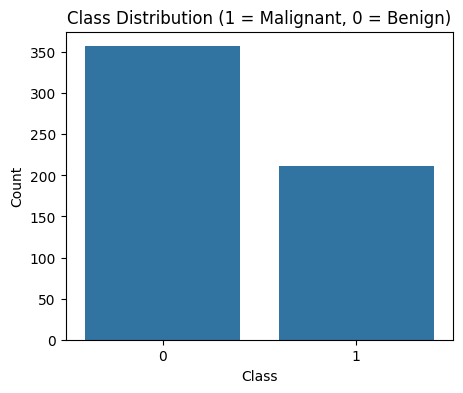

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
print(f"""num_nalignant: {len(y[y["diagnosis"]==1])}""")
print(f"""num_benign: {len(y[y["diagnosis"]==0])}""")
plt.figure(figsize=(5,4))
sns.countplot(x=y["diagnosis"])
plt.title("Class Distribution (1 = Malignant, 0 = Benign)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [4]:
import numpy as np

def calculate_zscore(column):

    col_mean = column.mean()
    col_std = column.std(ddof=1)

    if col_std == 0:
        return np.zeros_like(column)
    
    return abs((column - col_mean) / col_std)

x_z = x.apply(calculate_zscore)

print(x_z.head(10))

#aply z_score for original dtaframe 

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100      2.071512        1.268817   0.983510         1.567087   
1     1.828212      0.353322        1.684473   1.907030         0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3     0.768233      0.253509        0.592166   0.763792         3.280667   
4     1.748758      1.150804        1.775011   1.824624         0.280125   
5     0.475956      0.834601        0.386808   0.505206         2.235455   
6     1.169878      0.160508        1.137124   1.094332         0.123028   
7     0.118413      0.358135        0.072803   0.218772         1.602639   
8     0.319885      0.588312        0.183919   0.383870         2.199903   
9     0.473118      1.104467        0.329192   0.508616         1.581308   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1          0.

In [5]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Compute mutual information between each feature and the label
mi_scores = mutual_info_classif(x, y, discrete_features=False, random_state=42)

mi_scores = pd.Series(mi_scores, index=x.columns)

mi_scores_sorted = mi_scores.sort_values(ascending=False)


/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
mi_norm = (mi_scores - mi_scores.min()) / (mi_scores.max() - mi_scores.min())

x_z = x_z * mi_norm
#print(x_z_combined.head(3))

In [7]:
from sklearn.preprocessing import KBinsDiscretizer

methods = ['uniform', 'quantile', 'kmeans']
labels = ['low', 'medium', 'high']
x_binned_dict = {}
sensitivity = []
for method in methods:
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy=method)
    x_binned = pd.DataFrame(kbd.fit_transform(x), columns=x.columns)
    x_binned_val = x_binned.copy()
    x_binned = x_binned.applymap(lambda v: labels[int(v)])
    x_binned_dict[method] = x_binned
    mii = mutual_info_classif(x_binned_val, y[["diagnosis"]], discrete_features=True, random_state=42)
    for feature_name, mi_value in zip(x.columns, mii):
            sensitivity.append({
                "feature": feature_name,
                "strategy": method,
                "mi_score": mi_value
            })
df_sensitivity = pd.DataFrame(sensitivity)


/var/folders/ks/g_jt7zjj43s70nc71g14tzrm0000gn/T/ipykernel_20521/22062061.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_binned = x_binned.applymap(lambda v: labels[int(v)])
/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/var/folders/ks/g_jt7zjj43s70nc71g14tzrm0000gn/T/

In [8]:
# highest MI per feature
grouped = df_sensitivity.groupby("feature")

# 2️⃣ Compute mean, std, min, max of MI per feature
mi_stats = grouped["mi_score"].agg(["mean", "std", "min", "max"]).reset_index()

# 3️⃣ Add a new column showing range (difference between best and worst strategy)
mi_stats["range"] = mi_stats["max"] - mi_stats["min"]

# 4️⃣ Sort features by how sensitive (variable) their MI scores are
mi_stats = mi_stats.sort_values("range", ascending=False)

#mi_stats
df_best = (
    df_sensitivity
    .sort_values("mi_score", ascending=False)
    .groupby("feature", as_index=False)
    .first()
)
df_best = df_best.sort_values(by=["mi_score", "feature"], ascending=[False, True])
mi_lookup = df_best.set_index("feature")["mi_score"]
mi_lookup


feature
radius_worst               0.414032
perimeter_worst            0.411533
concave points_worst       0.406316
area_worst                 0.403661
concave points_mean        0.391536
perimeter_mean             0.336905
area_mean                  0.321186
concavity_mean             0.321186
radius_mean                0.320838
area_se                    0.291188
concavity_worst            0.283640
perimeter_se               0.215049
radius_se                  0.205533
compactness_worst          0.192593
compactness_mean           0.192573
concave points_se          0.130881
concavity_se               0.122260
texture_worst              0.117872
texture_mean               0.105551
symmetry_worst             0.082340
smoothness_worst           0.082301
smoothness_mean            0.073553
compactness_se             0.067476
symmetry_mean              0.055116
fractal_dimension_worst    0.047250
fractal_dimension_se       0.025112
smoothness_se              0.012533
symmetry_se         

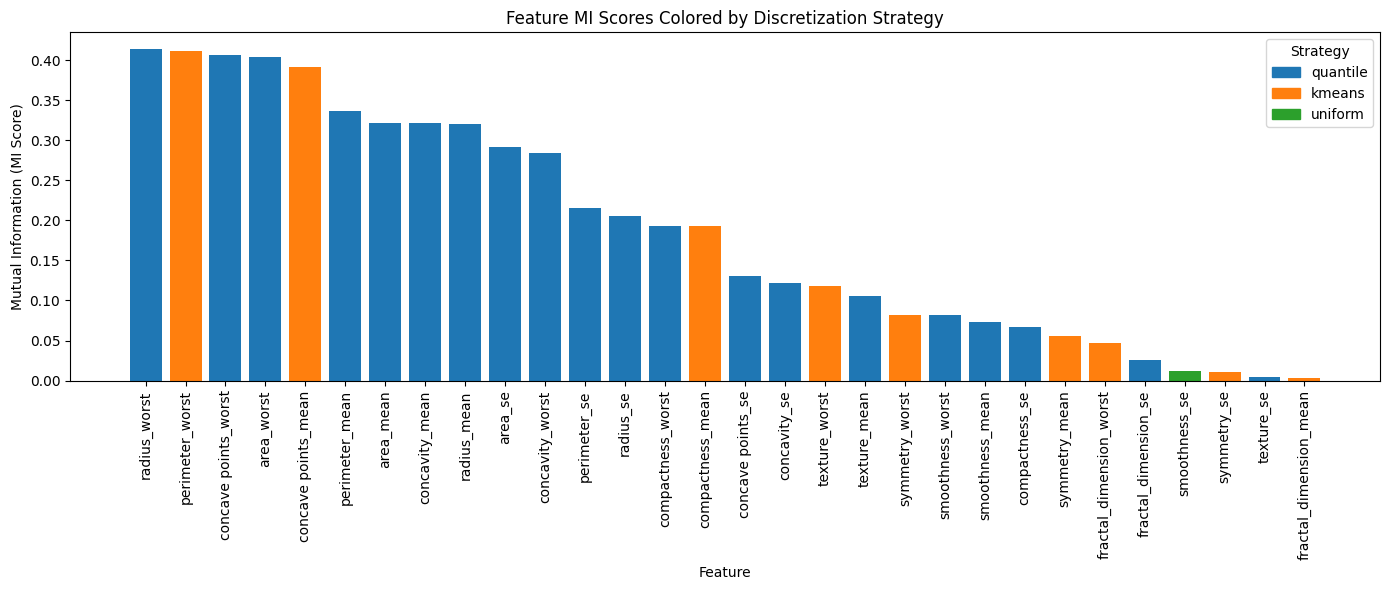

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Make a color map for strategy → color
strategies = df_best["strategy"].unique()
color_map = {s: c for s, c in zip(strategies, plt.cm.tab10.colors[:len(strategies)])}

plt.figure(figsize=(14, 6))

plt.bar(
    df_best["feature"],
    df_best["mi_score"],
    color=[color_map[s] for s in df_best["strategy"]]
)

# Axis formatting
plt.xticks(rotation=90)
plt.ylabel("Mutual Information (MI Score)")
plt.xlabel("Feature")
plt.title("Feature MI Scores Colored by Discretization Strategy")

# Legend
handles = [plt.Rectangle((0,0),1,1,color=color_map[s]) for s in strategies]
plt.legend(handles, strategies, title="Strategy")

plt.tight_layout()
plt.show()

In [10]:
x_z_binned = x_z.copy()  # new dataframe to fill in

for feature, strategy in zip(df_best["feature"], df_best["strategy"]):

    # Fit discretizer for this feature alone
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy=strategy)
    # sklearn expects 2D input, so reshape
    x_z_binned[feature] = discretizer.fit_transform(x_z[[feature]]).astype(int)
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy=strategy)
    discretizer.fit(x_z[[feature]])
    np.set_printoptions(suppress=True, precision=6)  # suppress scientific notation
    
bin_map = {
    0: "low",
    1: "medium",
    2: "high"
}

x_z_binned = x_z_binned.replace(bin_map)
x_z_binned.shape


/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:296: Future

(569, 30)

In [11]:

def get_top_k_ranked_features(row, threshold, k=9,idx=None):
    ttt =x_z.iloc[idx]
    features = sorted(
        ttt.index,
        key=lambda f: (-ttt[f], f)   # 1) value descending, 2) index ascending
    )
    itemsets = []
    fv_arr = [x_z.iloc[idx][f] for f in features]
    tmp = [[(fv_arr[0], features[0])]]
    for f in range(1, k):
        if abs(tmp[-1][0][0] - fv_arr[f]) <= threshold: tmp[-1].append((fv_arr[f], features[f]))
        else: tmp.append([(fv_arr[f], features[f])])
    for t in tmp: 
        t.sort(key=lambda x: x[1])  # sort by feature name
        tt = [] 
        for (_, f) in t: tt.append(f"{row[f]}_{f}")
        itemsets.append(tt)
    return itemsets



In [12]:
from pyspark.sql import Row
patLength = 30
support = 0.1
threshold = 0.1
total_malignant = len(y[y["diagnosis"]==1])
total_benign = len(y[y["diagnosis"]==0])
sequences = x_z_binned.apply(lambda row: get_top_k_ranked_features(row,threshold,k=30, idx=row.name), axis=1)
malig_seq = [] 
bnigh_seq = []
for (seq, label) in zip(sequences, y["diagnosis"]):
    if label==1: malig_seq.append(Row(sequence=seq))
    else: bnigh_seq.append(Row(sequence=seq))
t1 = [[tuple(o) for o in k] for obj in malig_seq for k in obj]
t2 = [[tuple(o) for o in k] for obj in bnigh_seq for k in obj]

In [18]:
from collections import Counter
from pyspark.ml.fpm import PrefixSpan
import time


from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, ArrayType, IntegerType
from pyspark.ml.fpm import PrefixSpan
spark = SparkSession.builder.appName("SequenceMining").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")
from pyspark.sql import Row
import logging
logging.getLogger("py4j").setLevel(logging.ERROR)
logging.getLogger("pyspark").setLevel(logging.ERROR)
logging.getLogger("clientserver").setLevel(logging.ERROR)

mSequenceDF = spark.createDataFrame(malig_seq)
prefixSpan = PrefixSpan(maxPatternLength=patLength) \
        .setMinSupport(support) \
        .setSequenceCol("sequence") # Specify the column containing your sequences

bSequenceDF = spark.createDataFrame(bnigh_seq)
prefixSpan = PrefixSpan(maxPatternLength=patLength) \
        .setMinSupport(support) \
        .setSequenceCol("sequence") # Specify the column containing your sequences


In [19]:

print("======== Malignant frequent sequence ========")
import time 
start = time.time()
result = prefixSpan.findFrequentSequentialPatterns(mSequenceDF)
end = time.time()
print("Time taken for malignant sequence mining: ", end - start)

seq_list = [(row.sequence, row.freq) for row in result.collect()]
seq_list.sort(key=lambda x: -x[1])
for i,e in seq_list:
    print(e,"/",total_malignant, i)



print("======== Benign frequent sequence ========")
start = time.time()
result = prefixSpan.findFrequentSequentialPatterns(bSequenceDF)
end = time.time()
print("Time taken for Benign sequence mining: ", end - start)
seq_list = [(row.sequence, row.freq) for row in result.collect()]
seq_list.sort(key=lambda x: -x[1])
for i,e in seq_list:
    print(e,"/",total_benign, i)


======== Malignant frequent sequence ========
Time taken for malignant sequence mining:  0.46658921241760254
212 / 212 [['low_texture_se']]
210 / 212 [['low_smoothness_se']]
173 / 212 [['low_texture_se', 'low_smoothness_se']]
151 / 212 [['low_fractal_dimension_worst']]
127 / 212 [['low_symmetry_worst']]
118 / 212 [['low_symmetry_mean']]
113 / 212 [['low_symmetry_se']]
109 / 212 [['low_texture_worst']]
109 / 212 [['high_concave points_worst']]
109 / 212 [['high_concave points_worst'], ['low_texture_se']]
108 / 212 [['high_concave points_worst'], ['low_smoothness_se']]
107 / 212 [['high_perimeter_mean']]
107 / 212 [['high_radius_mean']]
107 / 212 [['low_concavity_se']]
107 / 212 [['high_radius_mean'], ['low_texture_se']]
107 / 212 [['low_texture_se', 'low_symmetry_se']]
107 / 212 [['high_perimeter_mean'], ['low_texture_se']]
106 / 212 [['high_area_mean']]
106 / 212 [['high_radius_worst']]
106 / 212 [['high_area_mean'], ['low_texture_se']]
106 / 212 [['high_radius_worst'], ['low_texture_s

In [34]:
from gsp_python.gsp import GSP
hm = dict()
hmi = dict()
idx = 1 
for arr in t1:#malignant
    for tup in arr:
        for t in tup:
            if t not in hm:
                hm[t] = idx
                hmi[idx] = t 
                idx+=1 
for arr in t2:#benign
    for tup in arr:
        for t in tup:
            if t not in hm:
                hm[t] = idx
                hmi[idx] = t 
                idx+=1 
maglig_gsp_data_prep = [[[hm[j] for j in tup] for tup in arr] for arr in t1]
gsp_malig = GSP(maglig_gsp_data_prep, minsup=support)
time_start = time.time()
output = gsp_malig.run_gsp()
end_time = time.time()
print("Time taken for malignant GSP sequence mining: ", end_time - time_start)
output.sort(key=lambda x: -x[1])
mal_seq_result = [] 
mal_count_hm = dict()
ben_count_hm = dict()
print("====== Malignant frequent sequence ========")
for r,ct in output:
    print(f"{ct} / {total_malignant}", [tuple(hmi[d] for d in arr) for arr in r])
    mal_seq_result.append(tuple(tuple(hmi[d] for d in arr) for arr in r))
    mal_count_hm[tuple(tuple(hmi[d] for d in arr) for arr in r)] = ct

benign_gsp_data_prep = [[[hm[j] for j in tup] for tup in arr] for arr in t2]
gsp_benign = GSP(benign_gsp_data_prep, minsup=support)
print("====== Benign frequent sequence ========")
time_start = time.time()
output = gsp_benign.run_gsp()
time_end = time.time()
print("Time taken for benign GSP sequence mining: ", time_end - time_start)
output.sort(key=lambda x: -x[1])
ben_seq_result = [] 
for r,ct in output:
    print(f"{ct} / {total_benign}", [tuple(hmi[d] for d in arr) for arr in r])
    ben_seq_result.append(tuple(tuple(hmi[d] for d in arr) for arr in r))
    ben_count_hm[tuple(tuple(hmi[d] for d in arr) for arr in r)] = ct

Time taken for malignant GSP sequence mining:  0.7048497200012207
====== Malignant frequent sequence ========
212 / 212 [('low_texture_se',)]
210 / 212 [('low_smoothness_se',)]
173 / 212 [('low_smoothness_se', 'low_texture_se')]
151 / 212 [('low_fractal_dimension_worst',)]
127 / 212 [('low_symmetry_worst',)]
118 / 212 [('low_symmetry_mean',)]
113 / 212 [('low_symmetry_se',)]
109 / 212 [('high_concave points_worst',)]
109 / 212 [('low_texture_worst',)]
109 / 212 [('high_concave points_worst',), ('low_texture_se',)]
108 / 212 [('high_concave points_worst',), ('low_smoothness_se',)]
107 / 212 [('high_perimeter_mean',)]
107 / 212 [('high_radius_mean',)]
107 / 212 [('low_concavity_se',)]
107 / 212 [('high_perimeter_mean',), ('low_texture_se',)]
107 / 212 [('high_radius_mean',), ('low_texture_se',)]
107 / 212 [('low_texture_se', 'low_symmetry_se')]
106 / 212 [('high_radius_worst',)]
106 / 212 [('high_area_mean',)]
106 / 212 [('high_radius_worst',), ('low_texture_se',)]
106 / 212 [('high_area

In [ ]:
ben_seq_result = set(ben_seq_result)
mal_seq_result = set(mal_seq_result)

for obj in ben_seq_result & mal_seq_result:
    print(f"Common Sequence: {obj}, Malignant Count: {mal_count_hm[obj]}, Benign Count: {ben_count_hm[obj]}")

Common Sequence: (('low_concavity_mean',), ('low_symmetry_se',)), Malignant Count: 30, Benign Count: 64
Common Sequence: (('medium_concave points_se',), ('medium_fractal_dimension_mean',)), Malignant Count: 28, Benign Count: 38
Common Sequence: (('high_concave points_se',), ('low_texture_worst',)), Malignant Count: 39, Benign Count: 56
Common Sequence: (('medium_symmetry_worst',), ('low_smoothness_se', 'low_texture_se')), Malignant Count: 53, Benign Count: 82
Common Sequence: (('medium_concave points_worst',), ('low_fractal_dimension_se',)), Malignant Count: 24, Benign Count: 38
Common Sequence: (('medium_concave points_mean',), ('high_perimeter_se',), ('low_texture_se',)), Malignant Count: 28, Benign Count: 60
Common Sequence: (('low_fractal_dimension_mean', 'low_compactness_se'),), Malignant Count: 45, Benign Count: 47
Common Sequence: (('medium_texture_worst',), ('low_fractal_dimension_worst',), ('low_smoothness_se',)), Malignant Count: 27, Benign Count: 63
Common Sequence: (('mediu